# Context

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, body mass index (bmi), children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Acknowledgements

Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6 This link is no longer working but many reference from this dataset makes reference to this link at Kaggle https://www.kaggle.com/noordeen/insurance-premium-prediction

Here is a link to Prof. Suess website in case of additional questions

http://cox.csueastbay.edu/~esuess/#prof-eric-a-suesss-website



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
insdf = pd.read_csv('insurance.csv')

In [4]:
insdf.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
insdf.rename(columns = {'expenses':'charges'}, inplace = True) 

In [6]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
insdf.shape

(1338, 7)

In [8]:
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
insdf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
insdf.corr()['charges'].value_counts()

0.299008    1
0.067998    1
0.198576    1
1.000000    1
Name: charges, dtype: int64

In [12]:
insdf.corr()

,age,bmi,children,charges
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
charges,0.299008,0.198576,0.067998,1.000000


In [13]:
insdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis (EDA)

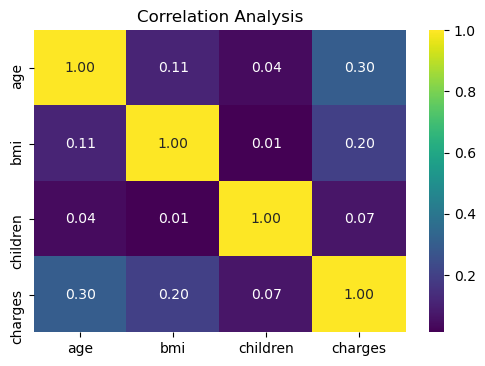

In [14]:
corr = insdf.corr()
#mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")


In [15]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR') # This line take care of the ERROR generated by the graphic bellow

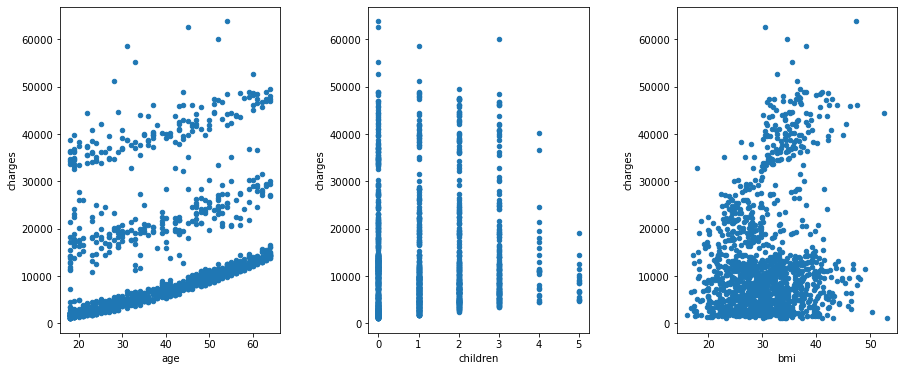

In [16]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
insdf.plot(kind='scatter', x='age', y='charges', ax=axes[0])
insdf.plot(kind='scatter', x='children', y='charges', ax=axes[1])
insdf.plot(kind='scatter', x='bmi', y='charges', ax=axes[2])

Possible interpretation from scatterplots:

1. x = 'age' and y = 'charges'
Here it is clear that with an increase in age there is a clear increase in charges but there is also some sort of boundary one could say that this is a good indication to use Linear Regression to predict charges based on attributes since there seem to be some sort of linear correlation althought they are also seperated

or Support Vector Mechine (SVM) algorithm for classifiction since some sort of linear decision boundary could fit inbetween the gaps in this graph (1) and one could then use the decision boundary to classify the charges 


2. x = 'children' and y = 'charges'
Here it is clear that the people with no children have the highest variance comapre to those with 5 children


3. x = 'body mass index(bmi)' and y = 'charges'
Cannot really make an assumption from this graph maybe 'hue' could assist with this interpretation to make image a bit more clear


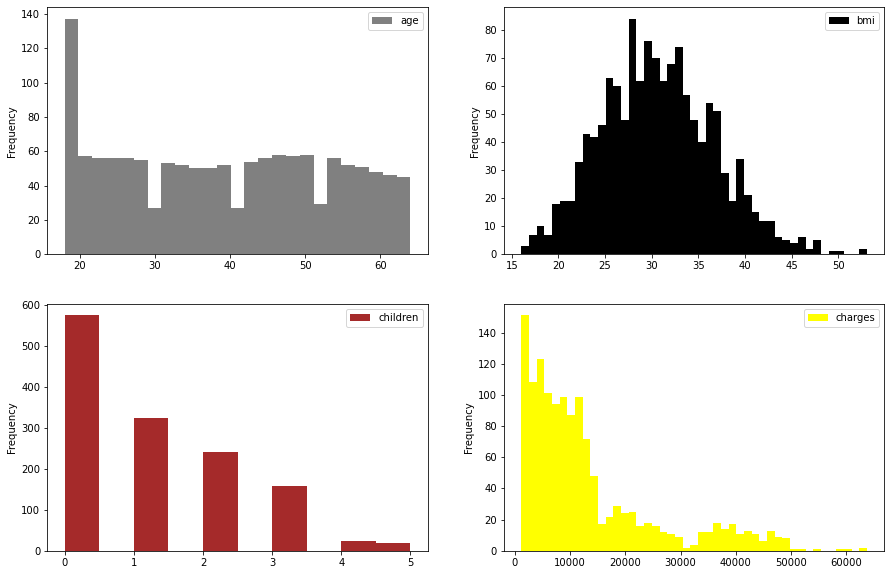

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

insdf.plot(kind='hist', y='age', ax=axes[0][0], color = 'grey', bins = 25)
insdf.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'black', bins = 45)
insdf.plot(kind='hist', y='children', ax=axes[1][0], color = 'brown', bins = 10)
insdf.plot(kind='hist', y='charges', ax=axes[1][1], color = 'yellow', bins = 45)

Possible interpretation from Histograms:

1. Frequency of 'age'
Clearly a very high range of young people 10 < frequency < 22, this is also a good time to start with insurance as the premiums are also low and they dont really increase as much as if you start later but logical see above point 1 and corresponding graph


2. Frequency of 'body mass index (bmi)'
Normal distribution with 28 < mean < 33, but some indept calculation would be needed if this would be required 



3. Frequency of 'children'
High frequency of individuals without any children



4. Frequency of 'charges'
Highest frequency of charges :  750 < mean < 2000 


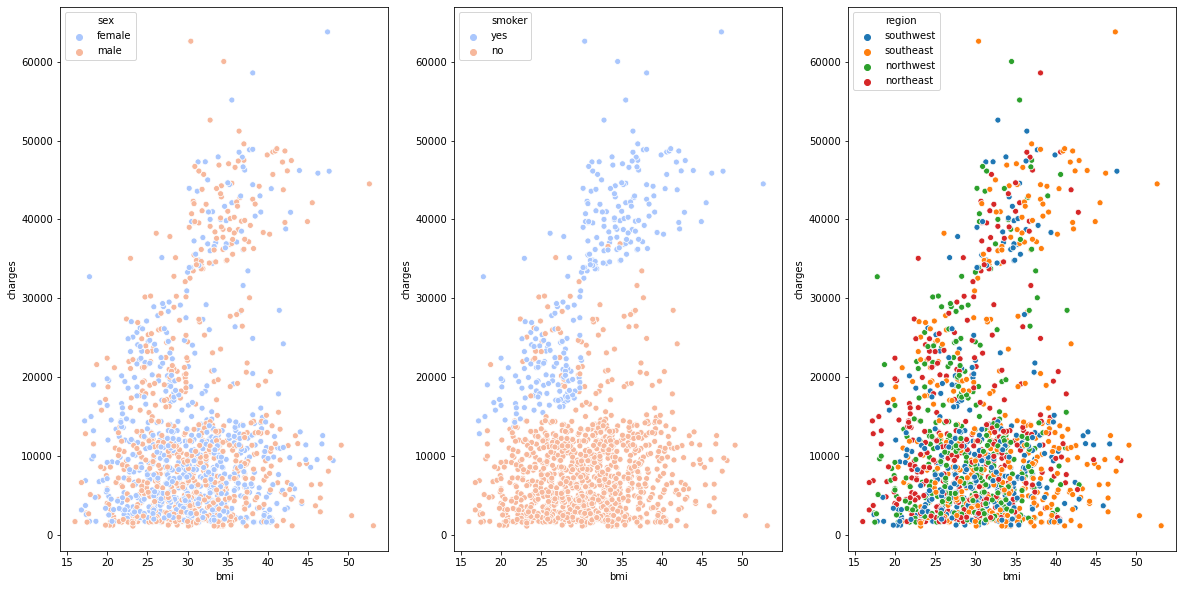

In [18]:
fig, axes = plt.subplots(ncols = 3, figsize = (20,10), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=insdf,hue='sex', palette='coolwarm')
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=insdf,hue='smoker', palette='coolwarm')
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=insdf,hue='region')

Possible interpretation from scatter plots with 'hue' indicators:

1. x = 'bmi', y = 'charges', hue = 'sex'
Similar charges between the sexes no real difference



2. x = 'bmi', y = 'charges', hue = 'smoker'
Massive difference in charges between smokers and non-smokers but this is obvious due to risk of smoking

Note: based on this data one could build a kNearest Neighbor (kNN) algorithm to cluster the data and build an algorithm to predict some features this is a good indication thereof



3. x = 'bmi', y = 'charges', hue = 'region'
Similar bmi between the region no real difference nothing really special to extract here 



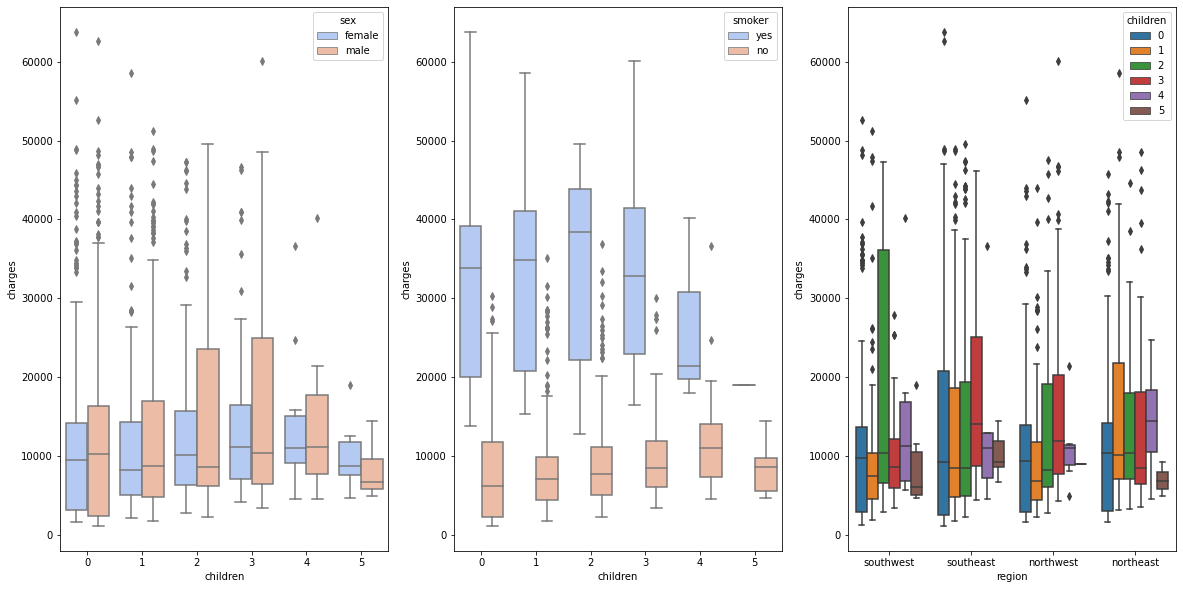

In [19]:
fig, axes = plt.subplots(ncols = 3, figsize = (20,10), squeeze=True)
sns.boxplot(x='children', y='charges', ax=axes[0], data=insdf,hue='sex', palette='coolwarm')
sns.boxplot(x='children', y='charges', ax=axes[1], data=insdf,hue='smoker', palette='coolwarm')
sns.boxplot(x='region', y='charges', ax=axes[2], data=insdf, hue='children')

Possible interpretation from box plots with 'hue' indicators:

1. x = 'children', y = 'charges', hue = 'sex'
The Upper and Lower Extreme Charges are quite different between male and female. As the amount of children increase so does this Upper and Lower Extreme Charges until the forth child then the Upper and Lower Extreme Charges decreases again. Large amount of outliers from 0 to 2 children, with little outliers from 3 - 5 children.



2. x = 'children, y = 'charges', hue = 'smoker'
Massive difference in charges between smokers and non-smokers, non-smokers get charged less than smoker obvious observation based on risk of smoking and charges. With more children the charges get smaller less for males, one could conclude that the more children the less males smoke. For femail the trends seems to be slighly increasing also an interesting observation. 

Note: based on this data one could build a kNearest Neighbor (kNN) algorithm to cluster the data and build an algorithm to predict some features this is a good indication 



3. x = 'region', y = 'charges', hue = 'children'
Similar bmi between the region no real difference nothing really special to extract here:

    South West: People with 2 children has the highest Upper Quartile charges, people with 0 children has the highest variance
    
    South East: People with 3 children get the highest Upper Quartile charges, people with 0 children has the highest variance
    
    North West: People with 3 children get charged the most, people with 5 children has the highest variance
    
    North Eest: People with 1 children get charged the most, people with 4 children has the highest variance
 

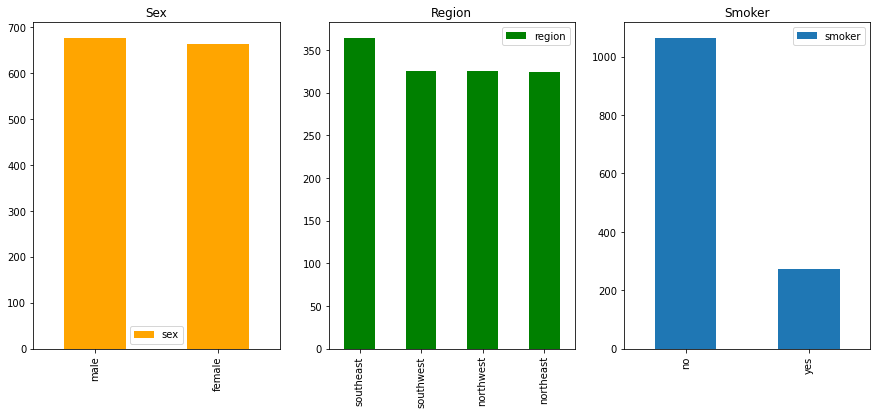

In [20]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
insdf['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
insdf['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
insdf['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

Possible interpretation from histograms with 'hue' indicators:

1. x = 'sex', y = 'value_count()'
More male then females but about +/- 20 people differnence



2. x = 'region', y = 'value_count()'
Most people from the 'southeast', similar amount of people from the rest of the regions 


3. x = 'smokers', y = 'value_count()'
High amount of non-smokers compared to smokers about 25 % of the people smoke and about 75 % are non smokers

## CREATE A TEST SET

Creating a test set is theorretically simple, selecting from the data randomly typically around 20% of the dataset i.e. if you have a very large dataset one can also select less data and set this dataset aside for after the training. 

This means that (+- 20 %) of the dataset (training data) will be used to study and construct a model and the remainding data (test data) from our dataset (+- 80 %) will be used to test our constructed model 

Text(0.5, 1.0, 'Distribution of Charges')

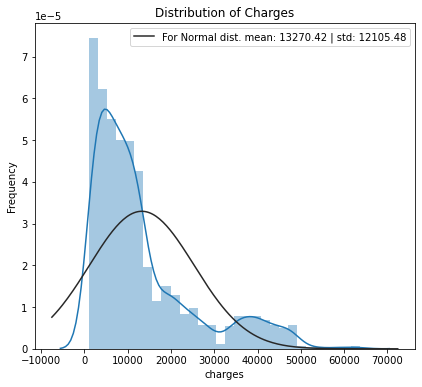

In [21]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(insdf['charges'], fit=norm)
(mu,sigma)= norm.fit(insdf['charges'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')

Text(0.5, 1.0, 'Distribution of BMI')

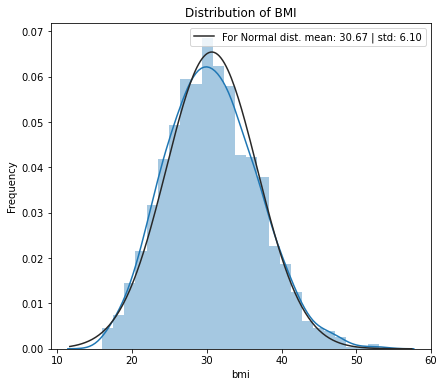

In [22]:
fig =plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(insdf['bmi'], fit=norm)
(mu,sigma)= norm.fit(insdf['bmi'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

Text(0.5, 1.0, 'Distribution of Age')

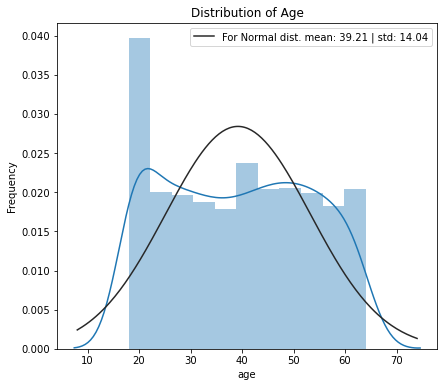

In [23]:
fig =plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(insdf['age'], fit=norm)
(mu,sigma)= norm.fit(insdf['age'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Age')

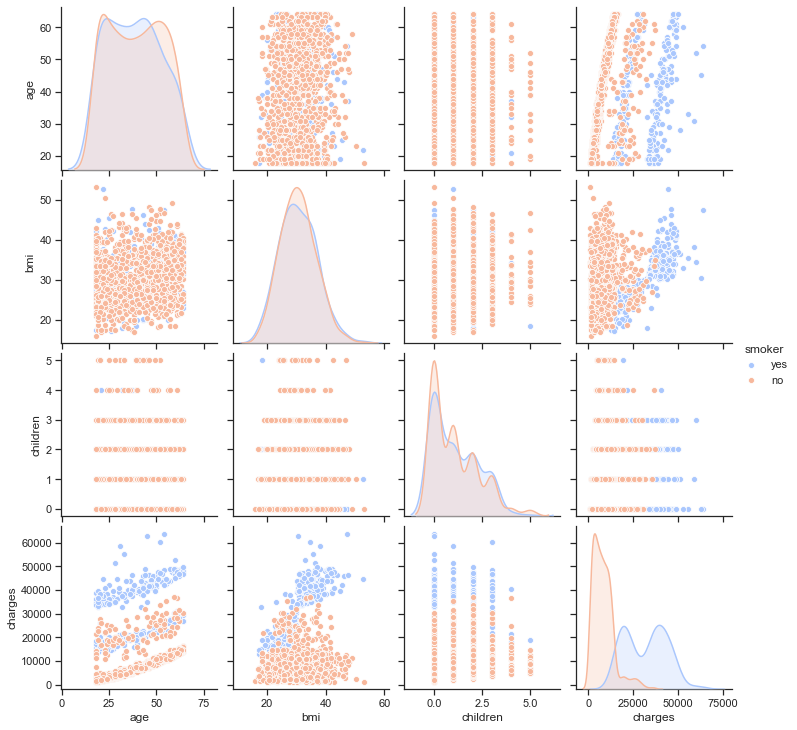

In [24]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='smoker', palette='coolwarm')

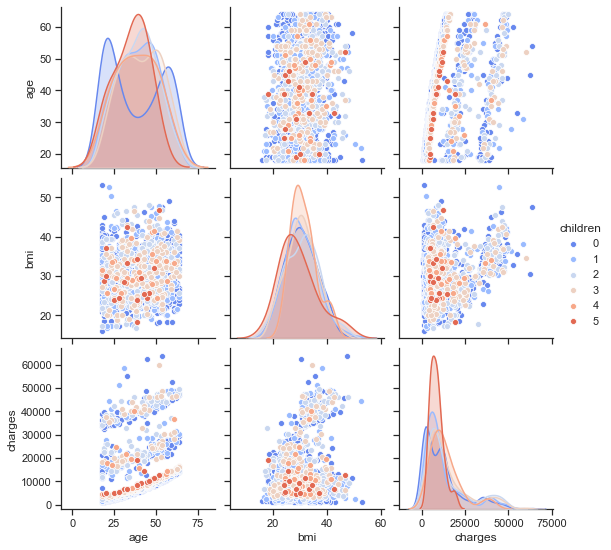

In [25]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='children', palette='coolwarm')

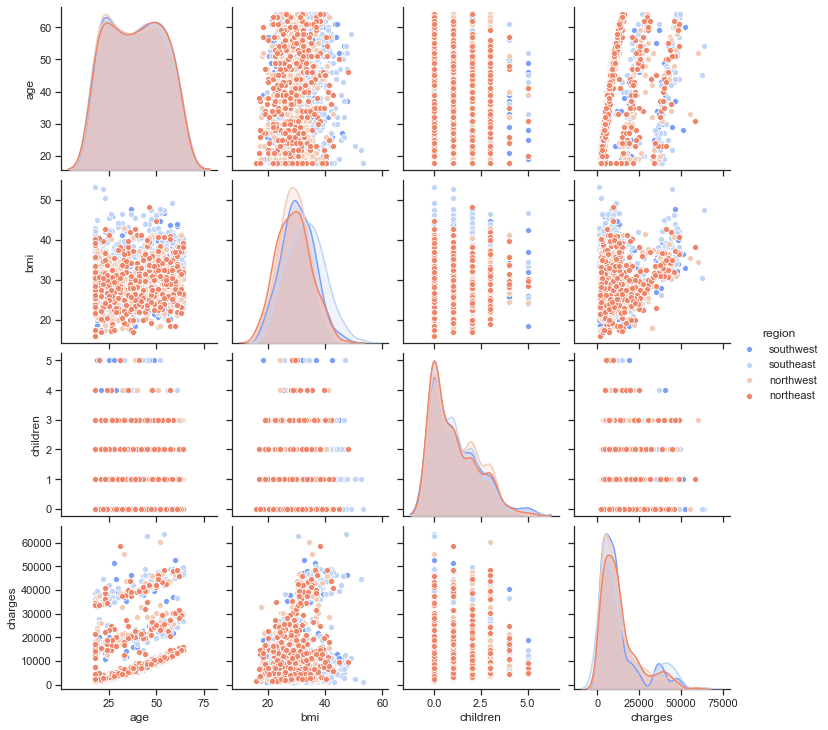

In [26]:
sns.set(style="ticks")
sns.pairplot(data=insdf, hue='region', palette='coolwarm')

In [27]:
insdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [28]:
insdf.drop(["region"], axis=1, inplace=True) 

In [29]:
insdf.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [30]:
# Changing binary categories to 1s and 0s
insdf['sex'] = insdf['sex'].map(lambda s :1  if s == 'female' else 0)
insdf['smoker'] = insdf['smoker'].map(lambda s :1  if s == 'yes' else 0)

In [31]:
insdf.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


## CREATE A TEST SET

Creating a test set is theorretically simple, selecting from the data randomly typically around 20% of the dataset i.e. if you have a very large dataset one can also select less data and set this dataset aside for after the training. 

This means that (+- 20 %) of the dataset (training data) will be used to study and construct a model and the remainding data (test data) from our dataset (+- 80 %) will be used to test our constructed model 

In [32]:
from sklearn.model_selection import train_test_split

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 

train_test_split has several parameters. 

X, y. The first parameter is the dataset you're selecting to use.

train_size. This parameter sets the size of the training dataset. 

There are three options: None, which is the default
Int, which requires the exact number of samples, and 
float, which ranges from 0.1 to 1.0.

test_size. This parameter specifies the size of the testing dataset. 

The default state suits the training size. It will be set to 0.25 if the training size is set to default.

random_state. The default mode performs a random split using np.random.

In [33]:
from sklearn.linear_model import LinearRegression

Linear regression is a popular regression learning algorithm that learns a model which is a linear combination of features of the input example.


In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variable/s.


The binary dependent variable has two possible outcomes:

These features are also present in our data set, therefore making this the logic algorithm of choice for this problem

Since we are interested in predicting the 'charges' feature we have to equate this feature to y

We also have to remove the 'charges' feature from the X parameter since this is the feature that we would like to predict, if we keep it would create a bias and our model would not be able to function propertly

In [34]:
X = insdf.drop(['charges'], axis = 1)
y = insdf.charges
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

#CHECK IF THIS MIGHT FIX ERROR SVM GridSearch Model
#X = X.reshape(X.shape[1:])
#X = X.transpose()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

Shape of X:  (1338, 5)
Shape of y:  (1338,)
0.7952529674123328


.score() Return the coefficient of determination R^2 of the prediction

R^2 = 0.7952529674123328

In [35]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


Text(0, 0.5, 'Predicted Values')

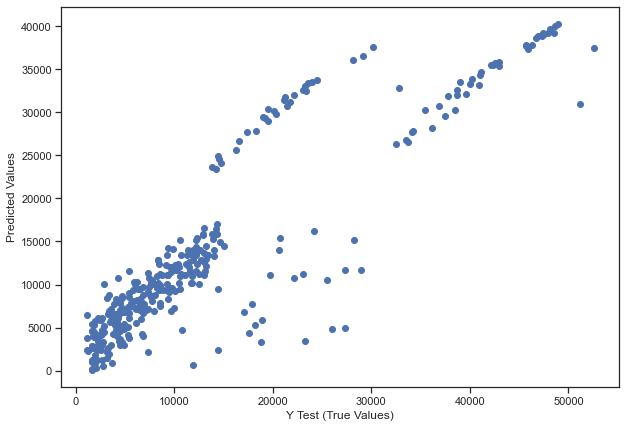

In [36]:
plt.figure(figsize = (10, 7))  # Make the figure larger
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

R^2 = 0.7952529674123328

Possible interpretation:

This is a very interesting observations as it is somewhat linear not the greatest linear trend but also it has some form of clustering.  This also has some non linear features. 

Linear Regression is surely not the only model to be tried on this data supervised algorithms:

1. Linear Regression [This is also quite obvious]


2. Support Vector Machines(SVM)

    a) LinearSVM
    
    b) Polynomial Features


3. Decision Tree and Random Forests


4. k-Nearest Neighbors (kNN) - [I look into possible model]




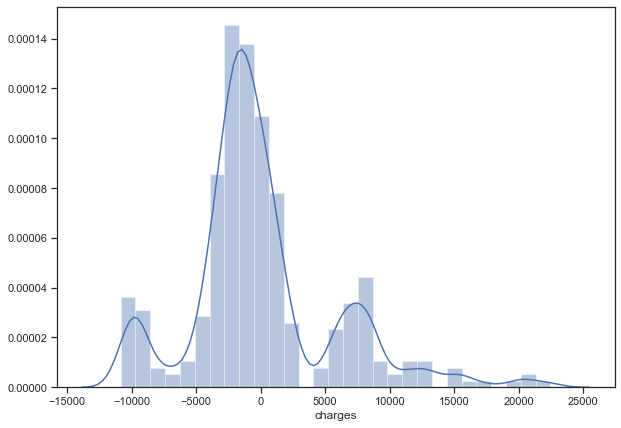

In [37]:
# Make the figure larger
plt.figure(figsize = (10, 7))
sns.distplot((y_test - y_test_pred)) 

# Feature Scaling 


Scikit-learn provides a transformation called StandardScaler for standardization  

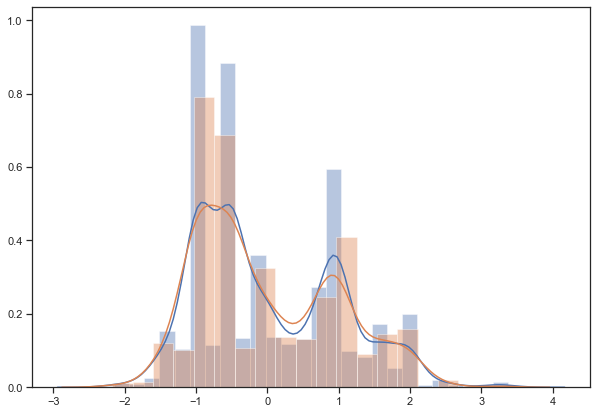

In [38]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

plt.figure(figsize = (10, 7))
sns.distplot((X_train))
sns.distplot((X_test)) 

StandardScaler. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [39]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.180051,-0.063607,-0.503736
1,1.548746,0.985155,-1.399832,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982538,-0.063607,-0.503736
3,-1.368757,0.985155,-1.014638,-0.892144,1.985167
4,-0.941805,0.985155,-1.367732,-0.892144,-0.503736


In [40]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84
131,13616.36
15,1837.24
1223,26125.67
1137,3176.29


In [41]:
def lr_model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    print("Training Data vs Predicted Model Data r2_score: ", accuracy_model_train)
    
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing Data vs Predict Model Data r2_score: ", accuracy_model_test)
    
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE Training Data vs Predicted Model Data r2_score: ", RMSE_model_train)
    
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE Testing Data vs Predict Model Data r2_score: ", RMSE_model_test)
    
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Score", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [42]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error  

In [43]:
from sklearn.linear_model import LinearRegression  


Linear regression is a popular regression learning algorithm that learns a model which is a linear combination of features of the input example.


In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variable/s.

The binary dependent variable has two possible outcomes:

These features are also present in our data set, therefore making this the logic algorithm of choice for this problem



In [44]:
multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
lr_model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Data vs Predicted Model Data r2_score:  -0.48955318862091035
Testing Data vs Predict Model Data r2_score:  -0.3240758269178261
RMSE Training Data vs Predicted Model Data r2_score:  14589.270271020132
RMSE Testing Data vs Predict Model Data r2_score:  14437.978854833256
Score 20 - Fold Cross Predicted:  0.7164406277916135


Linear Regression Model Evaluation:

Here the 

 - Training Score (R^2) = -0.48955318862091035 &

 - Testing Score  (R^2) = -0.3240758269178261
         
This mean that the training score (R^2) performs better with than the Testing score both having negative slopes.


The next step is to select a performance measure, and a typical performance measure for regression problems is the Root Mean Square Error (RMSE). It is important as it gives an indication as to how much error the system typically makes in its predictions, with higher weights for larger errors.


- RMSE for Training Data:  14589.270271020132
- RMSE for Testing Data:  14437.978854833256

RMSE of the 'charges' in the Training Data prediction vs Model Prediction is about 150 appart from each other this is not a bad prediction.

- R^2 score for the 'charges' vs the predicted 'charges' is R^2 score = 0.7164406277916135 

This is not such a good model with a 28 % error. One could try other supervised models to see if one gets any improvements on the score from other models. 

In [45]:
from sklearn.svm import SVR, LinearSVR  

Support Vector Machnies (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and outlier detections. 

SVM sees every feature vector as a point in a high dimensional space. The algorithm plots a imaginary line (a hyperplane) that separates examples with positive labels from exampleas with negative labels. The boundary separates the examples of different classes is called the decision boundary.  


In [46]:
support_vector_reg = SVR(
    gamma="auto",
    kernel="linear",
    tol=0.0001,
    C=1000
)

support_vector_reg.fit(X_train, y_train)  
lr_model_summary(support_vector_reg, "Support_Vector_Regressor")


Support_Vector_Regressor
Training Data vs Predicted Model Data r2_score:  0.6522329215097323
Testing Data vs Predict Model Data r2_score:  0.7343309944586527
RMSE Training Data vs Predicted Model Data r2_score:  7049.36171474492
RMSE Testing Data vs Predict Model Data r2_score:  6467.261444554247
Score 20 - Fold Cross Predicted:  0.7009534980043328


In [52]:
# L1 Loss L1-norm loss function is also known as least absolute deviations (LAD),
# least absolute errors (LAE).

support_vector_regL1 = LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1000,
    loss='epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    max_iter=100000,
)
support_vector_regL1.fit(X_train, y_train)  
lr_model_summary(support_vector_regL1, "Linear_Support_Vector_Regressor")


Linear_Support_Vector_Regressor
Training Data vs Predicted Model Data r2_score:  0.6571229810709094
Testing Data vs Predict Model Data r2_score:  0.738395402387293
RMSE Training Data vs Predicted Model Data r2_score:  6999.624635014654
RMSE Testing Data vs Predict Model Data r2_score:  6417.6002141009985
Score 20 - Fold Cross Predicted:  0.7005889740894736


# L2 Loss L2-norm loss function is also known as least squares error (LSE).

support_vector_regL2 = LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1000,
    loss='squared_epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    max_iter=100000,
)
support_vector_regL2.fit(X_train, y_train)  
lr_model_summary(support_vector_regL2, "Linear_Support_Vector_Regressor")

print(svm.coef_)

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
# PolynomialFeatures(degree=6)

polynomial_features = PolynomialFeatures(degree=6)  
x_train_poly6 = polynomial_features.fit_transform(X_train)  
x_test_poly6 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly6, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly6)
y_pred_PR_test = polynomial_reg.predict(x_test_poly6)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Score:  0.8727157594497155
Testing Score:  -5.882439594891263e+18
RMSE for Training Data:  4264.7431457900575
RMSE for Testing Data:  30431874979525.254
Accuracy for 20-Fold Cross Predicted:  0.3119397795995008


In [120]:
# PolynomialFeatures(degree=5)

polynomial_features = PolynomialFeatures(degree=5)  
x_train_poly5 = polynomial_features.fit_transform(X_train)  
x_test_poly5 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly5, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly5)
y_pred_PR_test = polynomial_reg.predict(x_test_poly5)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Score:  0.859561991051369
Testing Score:  0.8584390002051693
RMSE for Training Data:  4479.689304242444
RMSE for Testing Data:  4720.867198737485
Accuracy for 20-Fold Cross Predicted:  0.768326035296325


In [121]:
# PolynomialFeatures(degree=4)

polynomial_features = PolynomialFeatures(degree=4)  
x_train_poly4 = polynomial_features.fit_transform(X_train)  
x_test_poly4 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly4, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly4)
y_pred_PR_test = polynomial_reg.predict(x_test_poly4)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Score:  0.8443219645291314
Testing Score:  0.8796035466084703
RMSE for Training Data:  4716.493424593592
RMSE for Testing Data:  4353.68315859398
Accuracy for 20-Fold Cross Predicted:  0.8246774243795537


In [122]:
# PolynomialFeatures(degree=3)

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly3 = polynomial_features.fit_transform(X_train)  
x_test_poly3 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly3, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly3)
y_pred_PR_test = polynomial_reg.predict(x_test_poly3)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)


PolynomialFeatures
Training Score:  0.8355730425249344
Testing Score:  0.8811297770719766
RMSE for Training Data:  4847.212644933721
RMSE for Testing Data:  4325.999964769428
Accuracy for 20-Fold Cross Predicted:  0.8393113776369041


In [123]:
# PolynomialFeatures(degree=2)

polynomial_features = PolynomialFeatures(degree=2)  
x_train_poly2 = polynomial_features.fit_transform(X_train)  
x_test_poly2 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly2, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly2)
y_pred_PR_test = polynomial_reg.predict(x_test_poly2)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Score: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)



PolynomialFeatures
Training Score:  0.82801790638884
Testing Score:  0.8848029589752304
RMSE for Training Data:  4957.322555109574
RMSE for Testing Data:  4258.637116484813
Accuracy for 20-Fold Cross Predicted:  0.8395930428464092


In [124]:
# PolynomialFeatures(degree=1)

polynomial_features = PolynomialFeatures(degree=1)  
x_train_poly1 = polynomial_features.fit_transform(X_train)  
x_test_poly1 = polynomial_features.fit_transform(X_test) 

polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly1, y_train)  

print("PolynomialFeatures")
y_pred_PR_train = polynomial_reg.predict(x_train_poly1)
y_pred_PR_test = polynomial_reg.predict(x_test_poly1)

accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training rScore: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing r2 Score: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X),
                                 y, cv=20)

accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)



PolynomialFeatures
Training rScore:  0.7327528521286562
Testing r2 Score:  0.7952529674123328
RMSE for Training Data:  6179.624716654145
RMSE for Testing Data:  5677.521416042546
Accuracy for 20-Fold Cross Predicted:  0.7465341458179153


Optimization of the PolynomialFeatures(degree=?) resulsted in a maximum degree value between 2 and 3, I would advise to selected the PolynomialFeatures(degree=3) since it has the best Training and Testing R^2 scores. 

PolynomialFeatures(degree=3) produces the best results.

# DecisionTreeRegressor

In [125]:
insdf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

## Optimization of DecisionTreeRegressor (max_depth=7) values

max_depth is a important feature to optimize because ...(write text from handbook here)

In [126]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor(max_depth=7) 
decision_tree_reg7 = DecisionTreeRegressor(max_depth=7, random_state=13)  
decision_tree_reg7.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg7, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.9133459562929982
Testing Data vs Predict Model Data r2_score:  0.7900932318092679
RMSE Training Data vs Predicted Model Data r2_score:  3518.843717898316
RMSE Testing Data vs Predict Model Data r2_score:  5748.614606421442
Score 20 - Fold Cross Predicted:  0.8197940055319923


In [127]:
# DecisionTreeRegressor(max_depth=6)

decision_tree_reg6 = DecisionTreeRegressor(max_depth=6, random_state=13)  
decision_tree_reg6.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg6, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.883669185821428
Testing Data vs Predict Model Data r2_score:  0.8533569067526368
RMSE Training Data vs Predicted Model Data r2_score:  4077.1148540093077
RMSE Testing Data vs Predict Model Data r2_score:  4804.860457648416
Score 20 - Fold Cross Predicted:  0.8399903416800177


In [128]:
# DecisionTreeRegressor(max_depth=5)


decision_tree_reg5 = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg5.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg5, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8694256881440832
Testing Data vs Predict Model Data r2_score:  0.8711939744446933
RMSE Training Data vs Predicted Model Data r2_score:  4319.509514116047
RMSE Testing Data vs Predict Model Data r2_score:  4503.167101749359
Score 20 - Fold Cross Predicted:  0.8519568550673102


In [129]:
# DecisionTreeRegressor(max_depth=4)


decision_tree_reg4 = DecisionTreeRegressor(max_depth=4, random_state=13)  
decision_tree_reg4.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg4, "Decision_Tree_Regression")


Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [130]:
# DecisionTreeRegressor(max_depth=3)


decision_tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=13)  
decision_tree_reg3.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg3, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8426134762536192
Testing Data vs Predict Model Data r2_score:  0.8751605751604958
RMSE Training Data vs Predicted Model Data r2_score:  4742.303378621416
RMSE Testing Data vs Predict Model Data r2_score:  4433.287052858354
Score 20 - Fold Cross Predicted:  0.8438670434405549


In [131]:
# DecisionTreeRegressor(max_depth=2)


decision_tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=13)  
decision_tree_reg2.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg2, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8133113499816631
Testing Data vs Predict Model Data r2_score:  0.8581213666760322
RMSE Training Data vs Predicted Model Data r2_score:  5164.93094843664
RMSE Testing Data vs Predict Model Data r2_score:  4726.160554635234
Score 20 - Fold Cross Predicted:  0.8221286029469272


In [132]:
# DecisionTreeRegressor(max_depth=1)


decision_tree_reg = DecisionTreeRegressor(max_depth=1, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.6037999511461961
Testing Data vs Predict Model Data r2_score:  0.6620408168557048
RMSE Training Data vs Predicted Model Data r2_score:  7524.243199594993
RMSE Testing Data vs Predict Model Data r2_score:  7294.274434179157
Score 20 - Fold Cross Predicted:  0.6179319522104469


## max_depth=4 produced the optical model parameters

In [188]:
# DecisionTreeRegressor(max_depth=4, random_state=13) 

decision_tree_reg13 = DecisionTreeRegressor(max_depth=4, random_state=13)  
decision_tree_reg13.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg13, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [189]:
# DecisionTreeRegressor(max_depth=4, random_state=12) 


decision_tree_reg12 = DecisionTreeRegressor(max_depth=4, random_state=12)  
decision_tree_reg12.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg12, "Decision_Tree_Regression")


Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [190]:
# DecisionTreeRegressor(max_depth=4, random_state=11) 


decision_tree_reg11 = DecisionTreeRegressor(max_depth=4, random_state=11)  
decision_tree_reg11.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg11, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [191]:
# DecisionTreeRegressor(max_depth4, random_state=10) 


decision_tree_reg10 = DecisionTreeRegressor(max_depth=4, random_state=10)  
decision_tree_reg10.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg10, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [192]:
# DecisionTreeRegressor(max_depth=4, random_state=9) 


decision_tree_reg9 = DecisionTreeRegressor(max_depth=4, random_state=9)  
decision_tree_reg9.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg9, "Decision_Tree_Regression")


Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701479
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.5325842146904
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [193]:
# DecisionTreeRegressor(max_depth=4, random_state=8) 


decision_tree_reg8 = DecisionTreeRegressor(max_depth=4, random_state=8)  
decision_tree_reg8 .fit(X_train, y_train) 
lr_model_summary(decision_tree_reg8, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [194]:
# DecisionTreeRegressor(max_depth=4, random_state=7) 


decision_tree_reg7 = DecisionTreeRegressor(max_depth=4, random_state=7)  
decision_tree_reg7.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg7, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701479
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.5325842146904
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [195]:
# DecisionTreeRegressor(max_depth=4, random_state=6) 


decision_tree_reg6 = DecisionTreeRegressor(max_depth=4, random_state=6)  
decision_tree_reg6.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg6, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [196]:
# DecisionTreeRegressor(max_depth=4, random_state=5) 


decision_tree_reg5 = DecisionTreeRegressor(max_depth=4, random_state=5)  
decision_tree_reg5.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg5, "Decision_Tree_Regression")





Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [198]:
# DecisionTreeRegressor(max_depth=4, random_state=4) 


decision_tree_reg4 = DecisionTreeRegressor(max_depth=4, random_state=4)  
decision_tree_reg4.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg4, "Decision_Tree_Regression")



Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701479
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292366
RMSE Testing Data vs Predict Model Data r2_score:  3977.5325842146904
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [199]:
# DecisionTreeRegressor(max_depth=4, random_state=3) 


decision_tree_reg3 = DecisionTreeRegressor(max_depth=4, random_state=3)  
decision_tree_reg3.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg3, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701479
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.5325842146904
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [200]:
# DecisionTreeRegressor(max_depth=4, random_state=2) 


decision_tree_reg2 = DecisionTreeRegressor(max_depth=4, random_state=2)  
decision_tree_reg2.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg2, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [201]:
# DecisionTreeRegressor(max_depth=4, random_state=1) 


decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=1)  
decision_tree_reg.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [202]:
# DecisionTreeRegressor(max_depth=4, random_state=0) 


decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=0)  
decision_tree_reg.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8559494932869032
Testing Data vs Predict Model Data r2_score:  0.8995089124701477
RMSE Training Data vs Predicted Model Data r2_score:  4536.939178292367
RMSE Testing Data vs Predict Model Data r2_score:  3977.532584214691
Score 20 - Fold Cross Predicted:  0.8505319079610447


In [203]:
# DecisionTreeRegressor(max_depth=4) 


decision_tree_reg = DecisionTreeRegressor(max_depth=5)  
decision_tree_reg.fit(X_train, y_train) 
lr_model_summary(decision_tree_reg, "Decision_Tree_Regression")




Decision_Tree_Regression
Training Data vs Predicted Model Data r2_score:  0.8694256881440832
Testing Data vs Predict Model Data r2_score:  0.8711939744446933
RMSE Training Data vs Predicted Model Data r2_score:  4319.509514116047
RMSE Testing Data vs Predict Model Data r2_score:  4503.167101749359
Score 20 - Fold Cross Predicted:  0.8519568550673102


# random_state parameter does not change the outcome of the set parameters only difference is when it is set to NONE! But this also has no significate differnece to the model outcome. 

# RandomForestRegressor 

In [204]:
from sklearn.ensemble import RandomForestRegressor  

#max_depth=7

random_forest_reg7 = RandomForestRegressor(n_estimators=400, max_depth=7, random_state=13)  
random_forest_reg7.fit(X_train, y_train) 
lr_model_summary(random_forest_reg7, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.9200637684074057
Testing Data vs Predict Model Data r2_score:  0.8894148573709443
RMSE Training Data vs Predicted Model Data r2_score:  3379.694129508349
RMSE Testing Data vs Predict Model Data r2_score:  4172.519396058098
Score 20 - Fold Cross Predicted:  0.8502204300308922


In [205]:
#max_depth=6

random_forest_reg6 = RandomForestRegressor(n_estimators=400, max_depth=6, random_state=13)  
random_forest_reg6.fit(X_train, y_train) 
lr_model_summary(random_forest_reg6, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.898854991021424
Testing Data vs Predict Model Data r2_score:  0.8939345267325622
RMSE Training Data vs Predicted Model Data r2_score:  3801.6995438254585
RMSE Testing Data vs Predict Model Data r2_score:  4086.3634400475285
Score 20 - Fold Cross Predicted:  0.8543588235780055


In [206]:
#max_depth=5


random_forest_reg5 = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.878251099532176
Testing Data vs Predict Model Data r2_score:  0.8969203533577584
RMSE Training Data vs Predicted Model Data r2_score:  4170.979793736701
RMSE Testing Data vs Predict Model Data r2_score:  4028.43567685455
Score 20 - Fold Cross Predicted:  0.857751048313981


In [207]:
#max_depth=4


random_forest_reg4 = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13)  
random_forest_reg4.fit(X_train, y_train) 
lr_model_summary(random_forest_reg4, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637394683008869
Testing Data vs Predict Model Data r2_score:  0.8993640003194018
RMSE Training Data vs Predicted Model Data r2_score:  4412.559775507499
RMSE Testing Data vs Predict Model Data r2_score:  3980.3994312652558
Score 20 - Fold Cross Predicted:  0.8589562598948643


In [208]:
#max_depth=3

random_forest_reg3 = RandomForestRegressor(n_estimators=400, max_depth=3, random_state=13)  
random_forest_reg3.fit(X_train, y_train) 
lr_model_summary(random_forest_reg3, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8493116046870379
Testing Data vs Predict Model Data r2_score:  0.8943633729375535
RMSE Training Data vs Predicted Model Data r2_score:  4640.293664656646
RMSE Testing Data vs Predict Model Data r2_score:  4078.0940365057995
Score 20 - Fold Cross Predicted:  0.8541446974340322


In [209]:
#max_depth=2

random_forest_reg2 = RandomForestRegressor(n_estimators=400, max_depth=2, random_state=13)  
random_forest_reg2.fit(X_train, y_train) 
lr_model_summary(random_forest_reg2, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8170813700623741
Testing Data vs Predict Model Data r2_score:  0.8668311796328311
RMSE Training Data vs Predicted Model Data r2_score:  5112.5142554323065
RMSE Testing Data vs Predict Model Data r2_score:  4578.795521117782
Score 20 - Fold Cross Predicted:  0.8275011575167793


In [210]:
#max_depth=1

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=1, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
lr_model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.6037925852673002
Testing Data vs Predict Model Data r2_score:  0.6617021542049784
RMSE Training Data vs Predicted Model Data r2_score:  7524.313142048003
RMSE Testing Data vs Predict Model Data r2_score:  7297.928247846591
Score 20 - Fold Cross Predicted:  0.6179288039938324


In [238]:
#max_depth=1

random_forest_reg = RandomForestRegressor(n_estimators=400, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
lr_model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.9739367738400742
Testing Data vs Predict Model Data r2_score:  0.8670397379412322
RMSE Training Data vs Predicted Model Data r2_score:  1929.8326436472062
RMSE Testing Data vs Predict Model Data r2_score:  4575.2086453434895
Score 20 - Fold Cross Predicted:  0.8282443291611534


# n estimator optimization


In [239]:
#max_depth=4 IDEAL 
#n_estimators=1 instead of 10


random_forest_reg5 = RandomForestRegressor(n_estimators=1, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8467832203987652
Testing Data vs Predict Model Data r2_score:  0.8985077260810891
RMSE Training Data vs Predicted Model Data r2_score:  4679.0612147825095
RMSE Testing Data vs Predict Model Data r2_score:  3997.2974308144676
Score 20 - Fold Cross Predicted:  0.8403728660378865


In [241]:
#max_depth=4
#n_estimators=10 instead of 20


random_forest_reg5 = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8617885251891221
Testing Data vs Predict Model Data r2_score:  0.8989183476974498
RMSE Training Data vs Predicted Model Data r2_score:  4444.0364529946255
RMSE Testing Data vs Predict Model Data r2_score:  3989.2030201613684
Score 20 - Fold Cross Predicted:  0.8578337080413613


In [242]:
#max_depth=4
#n_estimators=20 instead of 30


random_forest_reg5 = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8632549912424944
Testing Data vs Predict Model Data r2_score:  0.8985201209492538
RMSE Training Data vs Predicted Model Data r2_score:  4420.3972875536565
RMSE Testing Data vs Predict Model Data r2_score:  3997.053335941208
Score 20 - Fold Cross Predicted:  0.8590339968571945


In [243]:
#max_depth=4
#n_estimators=30 instead of 50


random_forest_reg5 = RandomForestRegressor(n_estimators=30, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8634797384448716
Testing Data vs Predict Model Data r2_score:  0.8988096520266285
RMSE Training Data vs Predicted Model Data r2_score:  4416.763222684695
RMSE Testing Data vs Predict Model Data r2_score:  3991.3472895878876
Score 20 - Fold Cross Predicted:  0.8596183665661322


In [244]:
#max_depth=4
#n_estimators=40 instead of 50


random_forest_reg5 = RandomForestRegressor(n_estimators=40, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.863651107383747
Testing Data vs Predict Model Data r2_score:  0.8991608090659028
RMSE Training Data vs Predicted Model Data r2_score:  4413.990250770682
RMSE Testing Data vs Predict Model Data r2_score:  3984.415759998288
Score 20 - Fold Cross Predicted:  0.8596512975906757


In [245]:
#max_depth=4
#n_estimators=50 instead of 60


random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8636668862751142
Testing Data vs Predict Model Data r2_score:  0.8983492301611571
RMSE Training Data vs Predicted Model Data r2_score:  4413.734840233667
RMSE Testing Data vs Predict Model Data r2_score:  4000.4174130225465
Score 20 - Fold Cross Predicted:  0.8597462154159009


In [246]:
#max_depth=4
#n_estimators=60 instead of 70


random_forest_reg5 = RandomForestRegressor(n_estimators=60, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8636228702224146
Testing Data vs Predict Model Data r2_score:  0.89902639769426
RMSE Training Data vs Predicted Model Data r2_score:  4414.447284561368
RMSE Testing Data vs Predict Model Data r2_score:  3987.070345178563
Score 20 - Fold Cross Predicted:  0.8597484360252207


In [247]:
#max_depth=4
#n_estimators=70 instead of 80


random_forest_reg5 = RandomForestRegressor(n_estimators=70, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.86358551161215
Testing Data vs Predict Model Data r2_score:  0.8990705273503682
RMSE Training Data vs Predicted Model Data r2_score:  4415.051881253031
RMSE Testing Data vs Predict Model Data r2_score:  3986.1989923321476
Score 20 - Fold Cross Predicted:  0.8596149511779319


In [248]:
#max_depth=4
#n_estimators=80 instead of 90


random_forest_reg5 = RandomForestRegressor(n_estimators=80, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637622454956785
Testing Data vs Predict Model Data r2_score:  0.8998412869946365
RMSE Training Data vs Predicted Model Data r2_score:  4412.190960221269
RMSE Testing Data vs Predict Model Data r2_score:  3970.9492866298347
Score 20 - Fold Cross Predicted:  0.8595021563911385


In [249]:
#max_depth=4
#n_estimators=90 instead of 100


random_forest_reg5 = RandomForestRegressor(n_estimators=90, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.863717212349237
Testing Data vs Predict Model Data r2_score:  0.8998776406608626
RMSE Training Data vs Predicted Model Data r2_score:  4412.920120891595
RMSE Testing Data vs Predict Model Data r2_score:  3970.228572165108
Score 20 - Fold Cross Predicted:  0.8595014853575886


In [250]:
#max_depth=4
#n_estimators=100 instead of 400 


random_forest_reg5 = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8636562869218603
Testing Data vs Predict Model Data r2_score:  0.8997493717327227
RMSE Training Data vs Predicted Model Data r2_score:  4413.9064119971445
RMSE Testing Data vs Predict Model Data r2_score:  3972.770931165333
Score 20 - Fold Cross Predicted:  0.8595444344928578


In [251]:
#max_depth=4
#n_estimators=200 instead of 100



random_forest_reg5 = RandomForestRegressor(n_estimators=200, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8636022872869741
Testing Data vs Predict Model Data r2_score:  0.8992039205938328
RMSE Training Data vs Predicted Model Data r2_score:  4414.780400735196
RMSE Testing Data vs Predict Model Data r2_score:  3983.5639452762007
Score 20 - Fold Cross Predicted:  0.8593910768385616


In [252]:
#max_depth=4
#n_estimators=300 instead of 200



random_forest_reg5 = RandomForestRegressor(n_estimators=300, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637444171023148
Testing Data vs Predict Model Data r2_score:  0.8994934404312619
RMSE Training Data vs Predicted Model Data r2_score:  4412.479645626451
RMSE Testing Data vs Predict Model Data r2_score:  3977.838771418683
Score 20 - Fold Cross Predicted:  0.859093786732709


In [253]:
#max_depth=4
#n_estimators=400 instead of 300



random_forest_reg5 = RandomForestRegressor(n_estimators=400, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637394683008869
Testing Data vs Predict Model Data r2_score:  0.8993640003194018
RMSE Training Data vs Predicted Model Data r2_score:  4412.559775507499
RMSE Testing Data vs Predict Model Data r2_score:  3980.3994312652558
Score 20 - Fold Cross Predicted:  0.8589562598948643


In [254]:
#max_depth=4
#n_estimators=500 instead of 400



random_forest_reg5 = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637404385955961
Testing Data vs Predict Model Data r2_score:  0.8994431448737688
RMSE Training Data vs Predicted Model Data r2_score:  4412.54406482821
RMSE Testing Data vs Predict Model Data r2_score:  3978.833943257484
Score 20 - Fold Cross Predicted:  0.858809068537608


In [255]:
#max_depth=4
#n_estimators=600 instead of 500

random_forest_reg5 = RandomForestRegressor(n_estimators=600, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637230257345347
Testing Data vs Predict Model Data r2_score:  0.8997689639364221
RMSE Training Data vs Predicted Model Data r2_score:  4412.825999399885
RMSE Testing Data vs Predict Model Data r2_score:  3972.38270845823
Score 20 - Fold Cross Predicted:  0.8589543403588588


In [256]:
#max_depth=4
#n_estimators=700 instead of 600

random_forest_reg5 = RandomForestRegressor(n_estimators=700, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637512828860665
Testing Data vs Predict Model Data r2_score:  0.8997804366363445
RMSE Training Data vs Predicted Model Data r2_score:  4412.368473988355
RMSE Testing Data vs Predict Model Data r2_score:  3972.155357426138
Score 20 - Fold Cross Predicted:  0.859042407958221


In [257]:
#max_depth=4
#n_estimators=800 instead of 700

random_forest_reg5 = RandomForestRegressor(n_estimators=800, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8637936275309489
Testing Data vs Predict Model Data r2_score:  0.8995099566382785
RMSE Training Data vs Predicted Model Data r2_score:  4411.6827622278415
RMSE Testing Data vs Predict Model Data r2_score:  3977.511919578383
Score 20 - Fold Cross Predicted:  0.8590343051944098


In [258]:
#max_depth=4
#n_estimators=900 instead of 800

random_forest_reg5 = RandomForestRegressor(n_estimators=900, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8638340901503604
Testing Data vs Predict Model Data r2_score:  0.8993444166875325
RMSE Training Data vs Predicted Model Data r2_score:  4411.027427618313
RMSE Testing Data vs Predict Model Data r2_score:  3980.7867026467516
Score 20 - Fold Cross Predicted:  0.8589776170374546


In [259]:
#max_depth=4
#n_estimators=1000 instead of 900

random_forest_reg5 = RandomForestRegressor(n_estimators=1000, max_depth=4, random_state=13)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8638308908644823
Testing Data vs Predict Model Data r2_score:  0.8994372661753743
RMSE Training Data vs Predicted Model Data r2_score:  4411.079246957238
RMSE Testing Data vs Predict Model Data r2_score:  3978.9502457354997
Score 20 - Fold Cross Predicted:  0.858950062640792


In [270]:
#max_depth=4 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=12

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=12)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8630255548060494
Testing Data vs Predict Model Data r2_score:  0.899980711839483
RMSE Training Data vs Predicted Model Data r2_score:  4424.1040961249
RMSE Testing Data vs Predict Model Data r2_score:  3968.1844657717897
Score 20 - Fold Cross Predicted:  0.8577881004556427


In [271]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=11

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=11)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8640990339615549
Testing Data vs Predict Model Data r2_score:  0.8976658068119221
RMSE Training Data vs Predicted Model Data r2_score:  4406.73397613004
RMSE Testing Data vs Predict Model Data r2_score:  4013.8427847629882
Score 20 - Fold Cross Predicted:  0.85809899996181


In [272]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=10

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=10)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8793525667713039
Testing Data vs Predict Model Data r2_score:  0.8981517267892591
RMSE Training Data vs Predicted Model Data r2_score:  4152.069414158695
RMSE Testing Data vs Predict Model Data r2_score:  4004.3018524642057
Score 20 - Fold Cross Predicted:  0.8571135060071613


In [273]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=9

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=9)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8769923145221215
Testing Data vs Predict Model Data r2_score:  0.8980699518793915
RMSE Training Data vs Predicted Model Data r2_score:  4192.486622108882
RMSE Testing Data vs Predict Model Data r2_score:  4005.909075201939
Score 20 - Fold Cross Predicted:  0.8570243811632074


In [274]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=8

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=8)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.878319620921757
Testing Data vs Predict Model Data r2_score:  0.8953899151320762
RMSE Training Data vs Predicted Model Data r2_score:  4169.805895843165
RMSE Testing Data vs Predict Model Data r2_score:  4058.2308706854865
Score 20 - Fold Cross Predicted:  0.8571704797791362


In [275]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=7

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=7)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8790977362442147
Testing Data vs Predict Model Data r2_score:  0.8965660939786056
RMSE Training Data vs Predicted Model Data r2_score:  4156.452084740465
RMSE Testing Data vs Predict Model Data r2_score:  4035.352110473306
Score 20 - Fold Cross Predicted:  0.8558734603874093


In [276]:
#max_depth=5 ---- Ideally optimized 
#n_estimators=50 ---- Ideally optimized
#random_state=6

random_forest_reg5 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=6)  
random_forest_reg5.fit(X_train, y_train) 
lr_model_summary(random_forest_reg5, "Random_Forest_Regression")

Random_Forest_Regression
Training Data vs Predicted Model Data r2_score:  0.8783715430162737
Testing Data vs Predict Model Data r2_score:  0.896562343329416
RMSE Training Data vs Predicted Model Data r2_score:  4168.916154380467
RMSE Testing Data vs Predict Model Data r2_score:  4035.4252733920343
Score 20 - Fold Cross Predicted:  0.8573276117592383


the random forest algorithm is an ensemble technique that combines multiple decision
trees. A random forest usually has a better generalization performance than an
individual decision tree due to randomness, which helps to decrease the model's
variance. Other advantages of random forests are that they are less sensitive to
outliers in the dataset and don't require much parameter tuning. The only parameter
in random forests that we typically need to experiment with is the number of trees in
the ensemble. The basic random forest algorithm for regression is almost identical to
the random forest algorithm for classification. The only difference is that we use the
MSE criterion to grow the individual decision trees, and the predicted target variable
is calculated as the average prediction over all decision trees.